### Computer vision problem using handcrafted features and shallow learning models and how different features contribute to image classification tasks.

#### Importing libraries and loading the data.

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:\\Users\\Chetan\\Downloads\\dataset_1\\dataset_full'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10000.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10019.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10025.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10144.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10150.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10160.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10191.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10217.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10224.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10346.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10376.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\104.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\1040.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\1041.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\pred\10411.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_

C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\2916.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\2964.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\2965.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3073.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3202.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3205.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\33.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3500.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\356.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3571.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3614.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3661.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3763.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\test\Streets\3764.jpg
C:\Users\

C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3054.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3069.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3117.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\312.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3222.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3247.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3249.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3261.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3278.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3343.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3440.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3453.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3454.jpg
C:\Users\Chetan\Downloads\dataset_1\dataset_full\train\street\3492.jpg
C:\User

#### Reading the data from the stored location.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
data_dir = 'C:\\Users\\Chetan\\Downloads\\dataset_1\\dataset_full'

In [4]:
os.listdir(data_dir)

['pred', 'test', 'train']

#### Considered around 1500 images to TRAIN the model

In [5]:
test_dir = data_dir + '\\test'

#### Considered around 1500 images to TEST the model

In [6]:
train_dir = data_dir + '\\train'

#### Considered around 500 images for PREDICTION

In [7]:
pred_dir = data_dir + '\\pred'

#### Data preprocessing

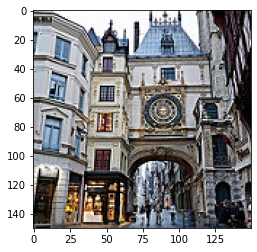

In [8]:
plt.imshow(imread(train_dir+'/buildings/'+os.listdir(train_dir+'/buildings')[0])) # an example of a building

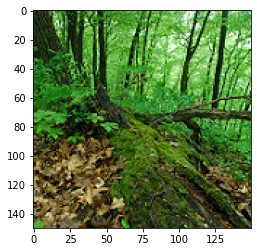

In [9]:
plt.imshow(imread(train_dir+'/forest/'+os.listdir(train_dir+'/forest')[0])) # an example of a forest

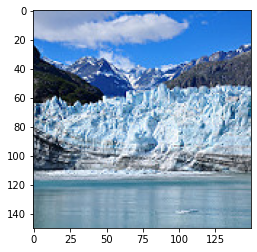

In [10]:
plt.imshow(imread(train_dir+'/glacier/'+os.listdir(train_dir+'/glacier')[0])) # an example of a glacier

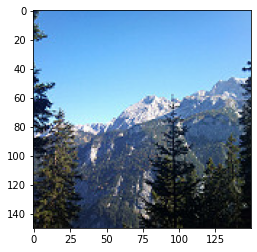

In [11]:
plt.imshow(imread(train_dir+'/mountain/'+os.listdir(train_dir+'/mountain')[0])) # an example of a mountain

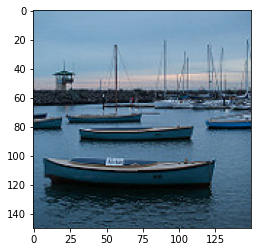

In [12]:
plt.imshow(imread(train_dir+'/sea/'+os.listdir(train_dir+'/sea')[0])) # an example of a sea

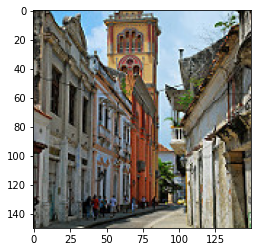

In [13]:
plt.imshow(imread(train_dir+'/street/'+os.listdir(train_dir+'/street')[0])) # an example of street

#### This is done so if there are any image of variable shapes so we will reshape all of them to an average shape

In [14]:
dim1 = []
dim2 = []

for image_file in os.listdir(train_dir+'/buildings'):
    img = imread(train_dir+'/buildings/'+image_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [15]:
height = int(np.average(d1))
height

150

In [16]:
width = int(np.average(d2))
width

150

In [17]:
img_shape = (height,width,3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Performing data augmentation and scaling on train set

In [19]:
image_train = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.1,
                                    rotation_range=10,
                                    fill_mode='nearest')

#### Performing scaling on test set

In [20]:
image_test = ImageDataGenerator(rescale=1/255)

In [21]:
train_data = image_train.flow_from_directory(directory=train_dir,
                                                    class_mode='categorical',
                                                    batch_size=128,
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    target_size=img_shape[:2])

Found 1577 images belonging to 6 classes.


In [22]:
test_data = image_test.flow_from_directory(directory=test_dir,
                                                  class_mode='categorical',
                                                  color_mode='rgb',
                                                  batch_size=128,
                                                  target_size=img_shape[:2],
                                                  shuffle=False)

Found 1472 images belonging to 6 classes.


In [23]:
train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [24]:
test_data.class_indices

{'Building': 0,
 'Forest': 1,
 'Glacier': 2,
 'Mountains': 3,
 'Sea': 4,
 'Streets': 5}

In [25]:
from tensorflow.keras.applications import MobileNetV2

In [26]:
# Instantiating a base model which we will not be trained and we'll import this model along with trained weights and biases
base_model = MobileNetV2(include_top=False,
                        weights='imagenet',
                        input_shape=img_shape)

In [27]:
# freezing the base model layers to avoid it's retraining.
base_model.trainable = False

In [28]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [29]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [30]:
# This layer provides us a vetor of features from the just previous volume of base model.
global_layer = GlobalAveragePooling2D()

In [31]:
# This layer makes raw predictions i.e, it returns numbers as logits.
pred_layer = Dense(6)

In [32]:
model =  Sequential ([base_model,global_layer,pred_layer]) # our modified model.

In [33]:
# Some trainable parameters these are due to the layers which we added on later.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [35]:
model.compile(optimizer=Adam(),
             loss=CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [38]:
history = model.fit(train_data,
         validation_data=test_data,
         epochs=15,
         callbacks=[early_stop])

Epoch 1/15
13/13 [==============================] - 45s 3s/step - loss: 1.5770 - accuracy: 0.3893 - val_loss: 0.9944 - val_accuracy: 0.6393
Epoch 2/15
13/13 [==============================] - 41s 3s/step - loss: 0.8825 - accuracy: 0.6785 - val_loss: 0.6086 - val_accuracy: 0.7812
Epoch 3/15
13/13 [==============================] - 39s 3s/step - loss: 0.6295 - accuracy: 0.7673 - val_loss: 0.5434 - val_accuracy: 0.8003
Epoch 4/15
13/13 [==============================] - 45s 4s/step - loss: 0.5408 - accuracy: 0.8072 - val_loss: 0.4584 - val_accuracy: 0.8376
Epoch 5/15
13/13 [==============================] - 46s 4s/step - loss: 0.5057 - accuracy: 0.8142 - val_loss: 0.4412 - val_accuracy: 0.8342
Epoch 6/15
13/13 [==============================] - 46s 4s/step - loss: 0.4583 - accuracy: 0.8332 - val_loss: 0.4078 - val_accuracy: 0.8607
Epoch 7/15
13/13 [==============================] - 45s 4s/step - loss: 0.4447 - accuracy: 0.8339 - val_loss: 0.4270 - val_accuracy: 0.8458
Epoch 8/15
13/13 [==

In [39]:
# trend of losses
loss_metrics = pd.DataFrame(model.history.history)
loss_metrics

,loss,accuracy,val_loss,val_accuracy
0,1.577011,0.389347,0.994392,0.639266
1,0.882539,0.678504,0.608588,0.781250
2,0.629515,0.767280,0.543377,0.800272
3,0.540833,0.807229,0.458388,0.837636
4,0.505679,0.814204,0.441233,0.834239
5,0.458318,0.833228,0.407832,0.860734
6,0.444669,0.833862,0.427043,0.845788
7,0.437865,0.842105,0.375343,0.867527
8,0.425209,0.842105,0.376685,0.869565
9,0.397980,0.857324,0.368455,0.870924


<AxesSubplot:title={'center':'LOSS VS EPOCH COUNT'}>

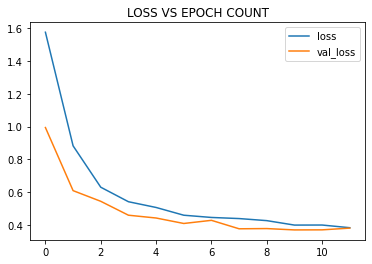

In [40]:
loss_metrics[['loss','val_loss']].plot(title='LOSS VS EPOCH COUNT')

<AxesSubplot:title={'center':'ACCURACY VS EPOCH COUNT'}>

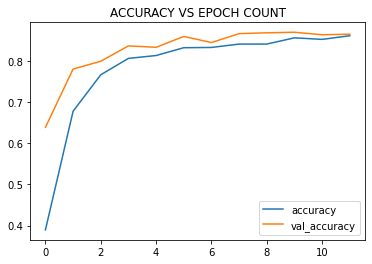

In [41]:
loss_metrics[['accuracy','val_accuracy']].plot(title='ACCURACY VS EPOCH COUNT')

In [42]:
test_data.classes

array([0, 0, 0, ..., 5, 5, 5])

#### Prediction

In [43]:
predictions = (model.predict(test_data) > 0.5).round()
predictions

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.]], dtype=float16)

In [44]:
def predict_label(class_number):
    if class_number==0:
        return 'building'
    elif class_number==1:
        return 'forest'
    elif class_number==2:
        return 'glacier'
    elif class_number==3:
        return 'mountain'
    elif class_number==4:
        return 'sea'
    else:
        return 'street'

In [45]:
from tensorflow.keras.preprocessing import image

In [46]:
def predict_name(directory_to_img):
    pred_image = image.load_img(directory_to_img,target_size=img_shape)
    pred_image_array = image.img_to_array(pred_image)
    pred_image_array = pred_image_array/255
    pred_image_array = pred_image_array.reshape(1,150,150,3)
    predict_x=model.predict(pred_image_array)
    classes_x=np.argmax(predict_x,axis=1)
    plt.imshow(imread(directory_to_img))
    return predict_label(predict_x.any())

'forest'

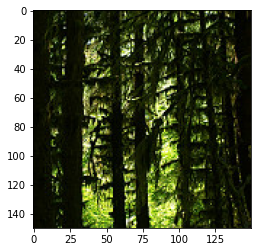

In [49]:
predict_name(data_dir+'\\pred\\'+os.listdir(data_dir+'\\pred\\')[9])

'forest'

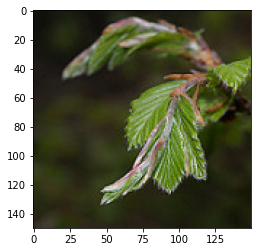

In [58]:
predict_name(data_dir+'\\pred\\'+os.listdir(data_dir+'\\pred\\')[436])